In [21]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
post_df = pd.read_csv('../predicting-satisfaction-using-graphs/csv/dataset/liwc_post.csv', encoding='UTF-8', index_col=0)
comment_df = pd.read_csv('../predicting-satisfaction-using-graphs/csv/dataset/liwc_comment.csv', encoding='UTF-8', index_col=0)
all_df = pd.read_csv('../predicting-satisfaction-using-graphs/csv/dataset/liwc_post_comment.csv', encoding='UTF-8', index_col=0)

In [26]:
post_df.drop(['content', 'Segment'], axis=1, inplace=True)
comment_df.drop(['content', 'Segment'], axis=1, inplace=True)
all_df.drop(['content', 'Segment'], axis=1, inplace=True)

In [27]:
comment_df

,satisfaction,satisfy1,satisfy2,satisfy3,satisfy4,WC,Analytic,Clout,Authentic,Tone,...,Comma,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP
0,3.15,3.0,3.2,3.4,3.0,33,49.25,11.29,51.41,25.77,...,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00
1,4.25,4.6,3.8,3.6,5.0,15,70.69,25.24,82.75,99.00,...,6.67,0.0,0.00,0.00,0.00,0.0,13.33,0.00,0.0,0.00
2,5.35,6.0,5.4,5.2,4.8,29,7.24,36.51,3.81,1.00,...,10.34,0.0,0.00,0.00,0.00,0.0,6.90,3.45,0.0,0.00
3,3.30,2.8,2.8,3.6,4.0,9,4.69,99.00,1.00,1.00,...,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00
4,3.80,3.4,3.4,4.0,4.4,75,16.36,97.69,43.37,25.77,...,5.33,0.0,0.00,0.00,1.33,0.0,2.67,1.33,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,5.95,6.4,5.4,6.0,6.0,65,7.08,62.10,11.67,7.80,...,1.54,0.0,0.00,3.08,0.00,0.0,3.08,0.00,0.0,0.00
996,4.30,4.2,4.2,4.4,4.4,16,1.92,99.00,7.84,25.77,...,0.00,0.0,0.00,12.50,0.00,0.0,0.00,0.00,0.0,0.00
997,4.30,4.4,4.0,4.4,4.4,22,32.58,67.52,31.94,1.00,...,0.00,0.0,0.00,0.00,4.55,0.0,0.00,0.00,0.0,0.00
998,4.25,4.6,3.2,4.0,5.2,12,81.63,20.24,74.76,25.77,...,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5,
        33.5, 34.5, 35.5, 36.5, 37.5, 38.5, 39.5, 40.5, 41.5, 42.5, 43.5,
        44.5, 45.5, 46.5, 47.5, 48.5, 49.5, 50.5, 51.5, 52.5, 53.5, 54.5,
        55.5, 56.5, 57.5, 58.5, 59.5, 60.5, 61.5, 62.5, 63.5, 64.5, 65.5,
        66.5, 67.5, 68.5, 69.5, 70.5, 71.5, 72.5, 73.5, 74.5, 75.5, 76.5,
        77.5, 78.5, 79.5, 80.5, 81.5, 82.5, 83.5, 84.5, 85.5, 86.5, 87.5,
        88.5, 89.5, 90.5, 91.5, 92.5, 93.5, 94.5, 95.5, 96.5, 97.5]),
 [Text(0, 0.5, 'satisfaction'),
  Text(0, 1.5, 'satisfy1'),
  Text(0, 2.5, 'satisfy2'),
  Text(0, 3.5, 'satisfy3'),
  Text(0, 4.5, 'satisfy4'),
  Text(0, 5.5, 'WC'),
  Text(0, 6.5, 'Analytic'),
  Text(0, 7.5, 'Clout'),
  Text(0, 8.5, 'Authentic'),
  Text(0, 9.5, 'Tone'),
  Text(0, 10.5, 'WPS'),
  Text(0, 11.5, 'Sixltr'),
  Text(0, 12.5,

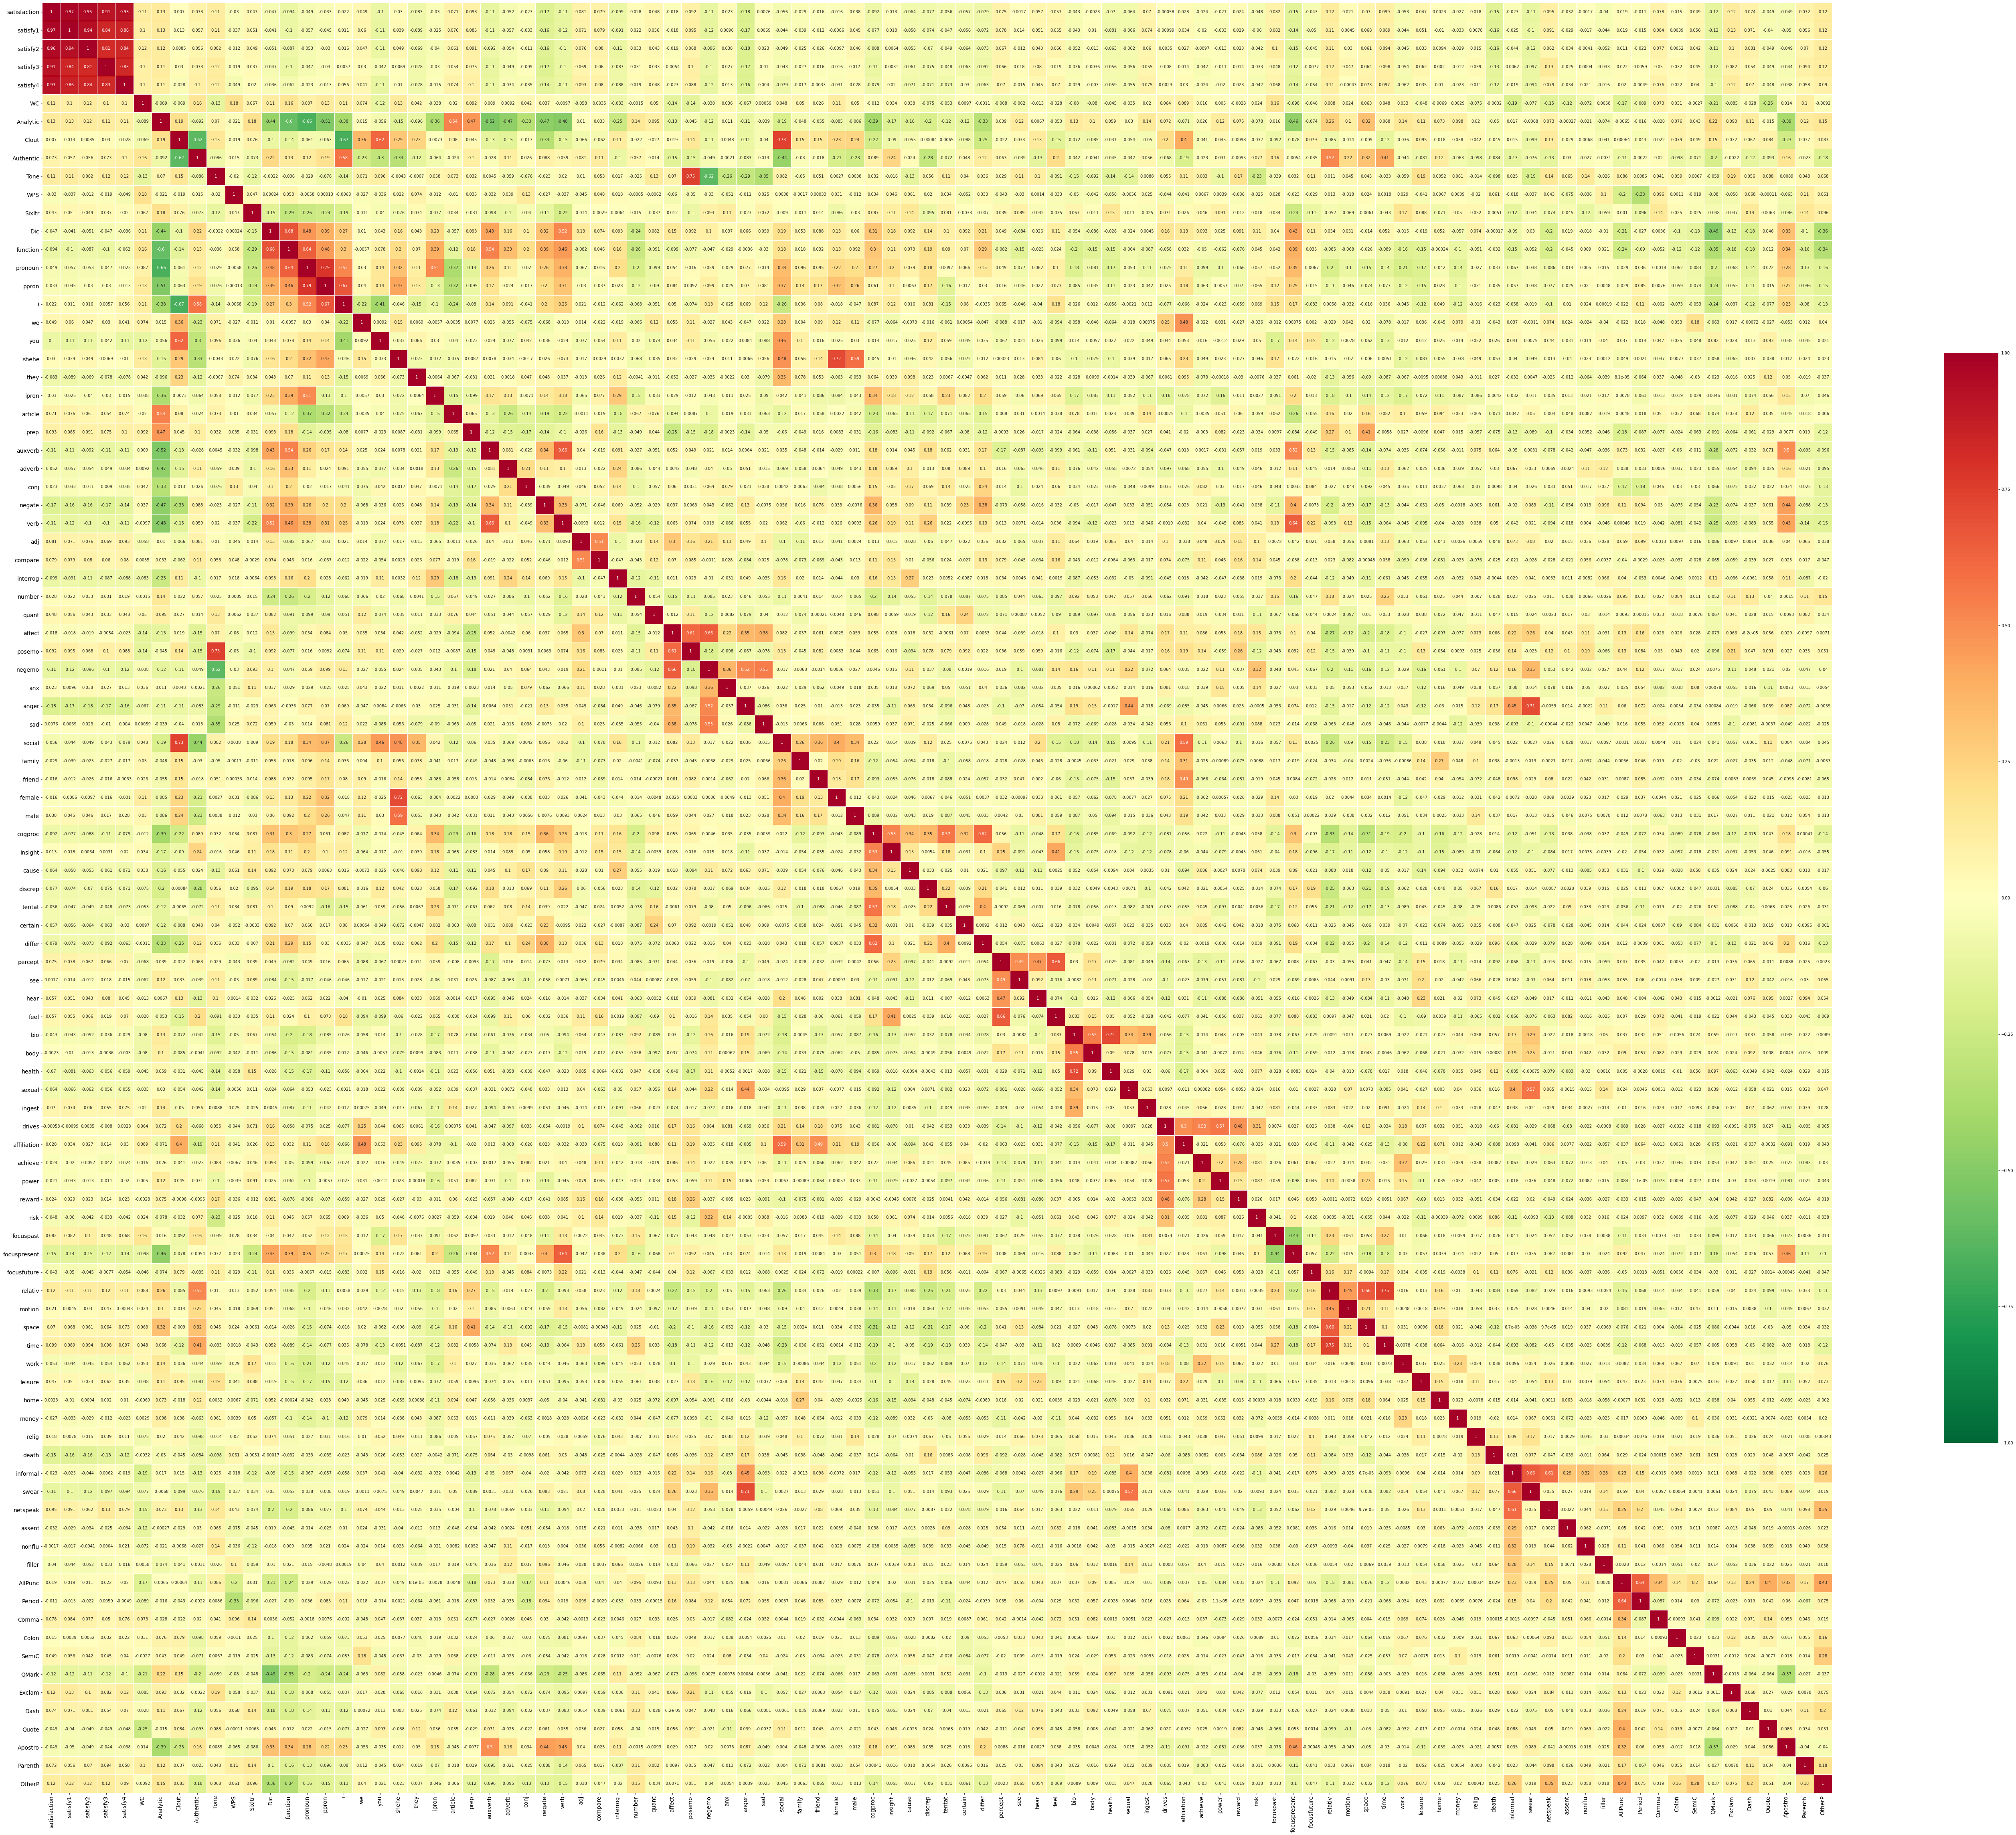

In [31]:
corr = all_df.corr(method='pearson')
plt.figure(figsize=(100,100))
ax = sns.heatmap(corr, annot=True,
            linewidths=.5,
            cbar_kws={"shrink": .5},
            vmin = -1,vmax = 1,
            square=True, cmap='RdYlGn_r')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)